In [71]:
import numpy as np
import pandas as pd

In [73]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [75]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
53,ham,Wow. I never realized that you were so embaras...,NaN,NaN,NaN
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...,NaN,NaN,NaN
911,ham,I am sorry it hurt you.,NaN,NaN,NaN
3304,ham,Ee msg na poortiyagi odalebeku: Hanumanji 7 na...,NaN,NaN,NaN
1324,ham,Can you call me plz. Your number shows out of ...,NaN,NaN,NaN


In [77]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [79]:
df.shape

(5572, 5)

In [81]:
# 1. Data cleaning- Removing NaN values
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation- How the model is working on test data
# 6. Improvement - How the model can be improved
# 7. Website- Making model available for all
# 8. Deployment - Deploying on any server

# 1.Data Cleaning

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [86]:
# Due to lack of data in last 3 columns we have to remove/drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
1633,ham,Yesterday its with me only . Now am going home.
5381,spam,You have 1 new message. Call 0207-083-6089
604,ham,Meet after lunch la...
553,ham,Ok. Every night take a warm bath drink a cup o...
3288,spam,Camera - You are awarded a SiPix Digital Camer...


In [88]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
# To get better understanding of datasets we will be changing the name of the columns from v1, v2 to Target(As it is our target to achieve, to recognise it is spam or not), v2 to text as it is the text part of the data which is helping us to read.
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3051,ham,Please leave this topic..sorry for telling that..
3447,ham,Its &lt;#&gt; k here oh. Should i send home f...
4114,ham,Sorry. You never hear unless you book it. One ...
3178,ham,Does cinema plus drink appeal tomo? * Is a fr ...
817,ham,Also are you bringing galileo or dobby


In [94]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [106]:
df['target']=encoder.fit_transform(df['target'])
# ham(not spam) = 0 and spam = 1

In [108]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [112]:
# Always make sure there is no missing values and also duplicated values
df.isnull().sum()

target    0
text      0
dtype: int64

In [114]:
df.duplicated().sum()

403

In [116]:
df = df.drop_duplicates(keep='first')

In [118]:
df.duplicated().sum()

0

In [120]:
df.shape

(5169, 2)

### Data is cleaned 
### Step 2. Exploratory Data analysis

In [131]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x27ade6a86d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

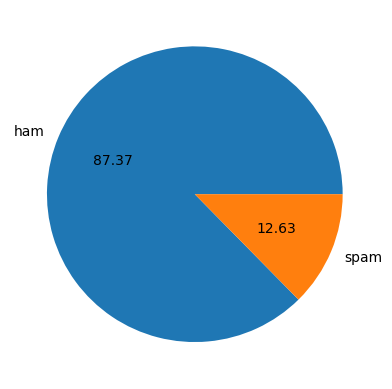

In [135]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [137]:
# From above pie chart, it is easily visible that Data is so much imbalanced.

In [139]:
import nltk

In [146]:
!pip install nltk

In [145]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [157]:
# Maximum length of any text message
max_length = max(df['text'].apply(len))
print(max_length)

910


In [159]:
# Minimum length of any text message
min_length = min(df['text'].apply(len))
print(min_length)

2


In [165]:
df['num_characters']=df['text'].apply(len)

In [167]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [179]:
# Number of words of each message in each message
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [180]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [187]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [193]:
# This is for ham it is making it possible to learn various things about ham
df[df['target']==0 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [195]:
# This is for spam
df[df['target']==1 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [197]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

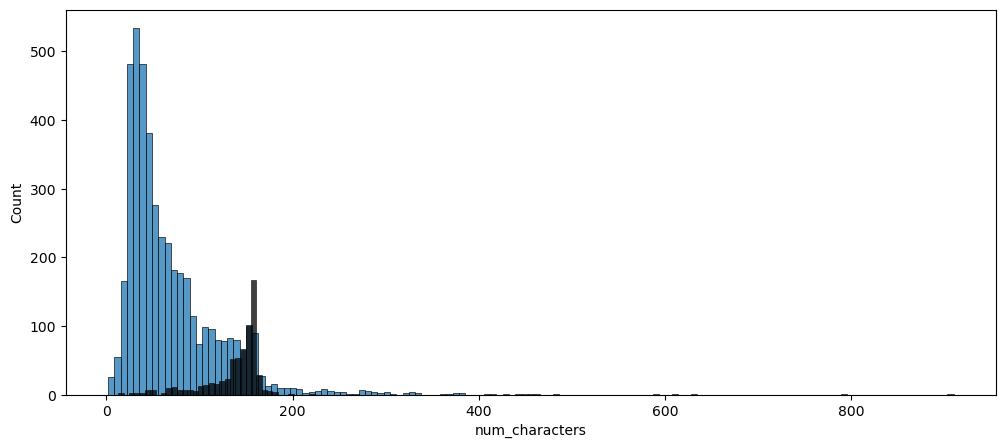

In [213]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='black')

<Axes: xlabel='num_words', ylabel='Count'>

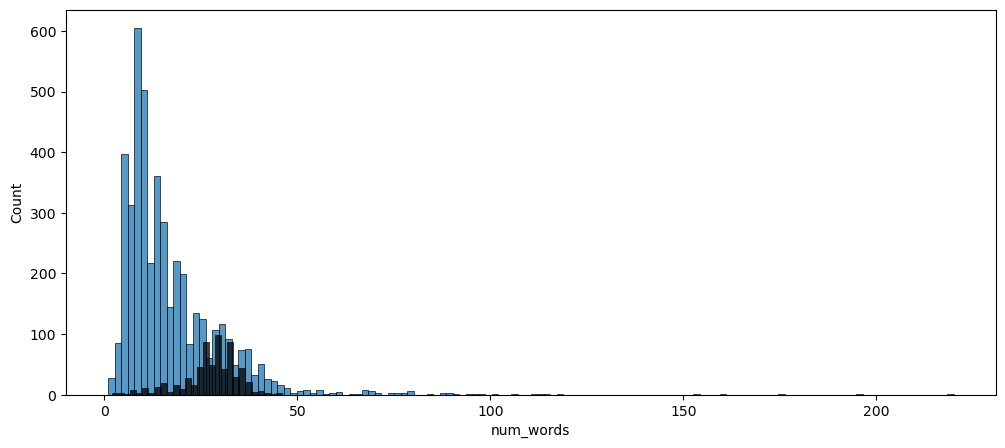

In [217]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='black')

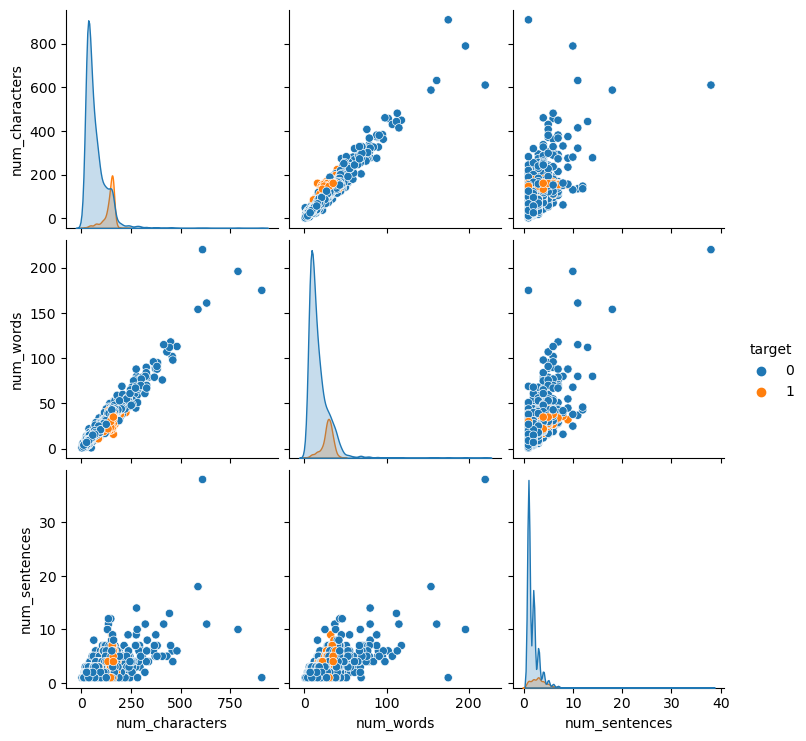

In [223]:
sns.pairplot(df, hue='target')

C:\Users\manis\AppData\Local\Temp\ipykernel_12192\3065595379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


<Axes: >

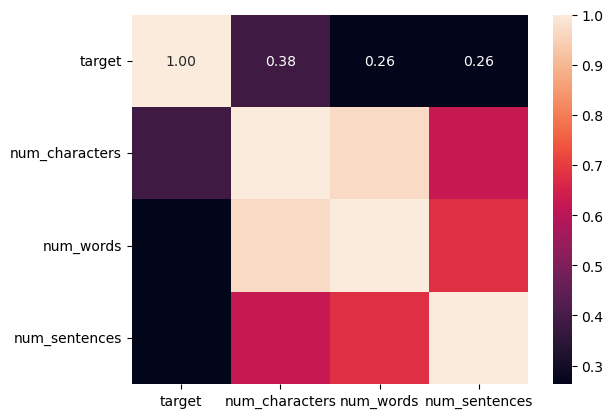

In [241]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [243]:
df.corr()

C:\Users\manis\AppData\Local\Temp\ipykernel_12192\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


C:\Users\manis\AppData\Local\Temp\ipykernel_12192\3291977161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.plot(df.corr())


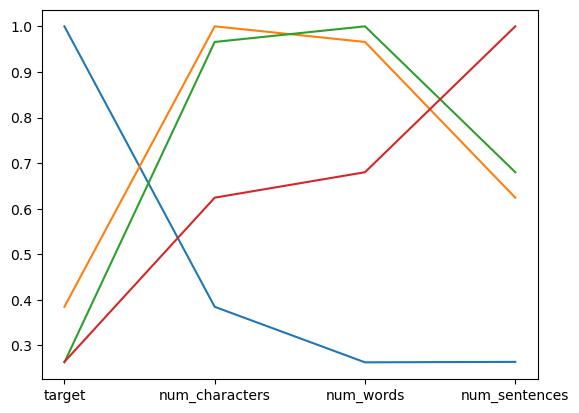

In [249]:
plt.plot(df.corr())

#### 3. Data Preprocessing
#### . Changing all data to lower case words
#### . Tokenization of words
#### . Removing stop words and punctuation and making one word of similar words as they mean the same
#### . Stemming
WIll create a single function which will be doing all the above steps alone

In [328]:
def transforming_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [306]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [340]:
transforming_text('I am learning and loving the youtube lectures what you are doing')

'learn love youtub lectur'

In [308]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [310]:
transforming_text('Hi how Have You lived 20 # % of your life Manish ?')

['hi', 'lived', '20', 'life', 'manish']

In [314]:
transforming_text('Artificial no ?')

['artificial']

In [326]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('reading')

'read'

In [343]:
df['transformed_text']= df['text'].apply(transforming_text)

In [345]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [346]:
df.tail()

,target,text,num_characters,num_words,num_sentences,transformed_text
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


In [368]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10, background_color='white')

In [364]:
spam_wc = wc.generate(df[df['target'] ==1 ]['transformed_text'].str.cat(sep=" "))

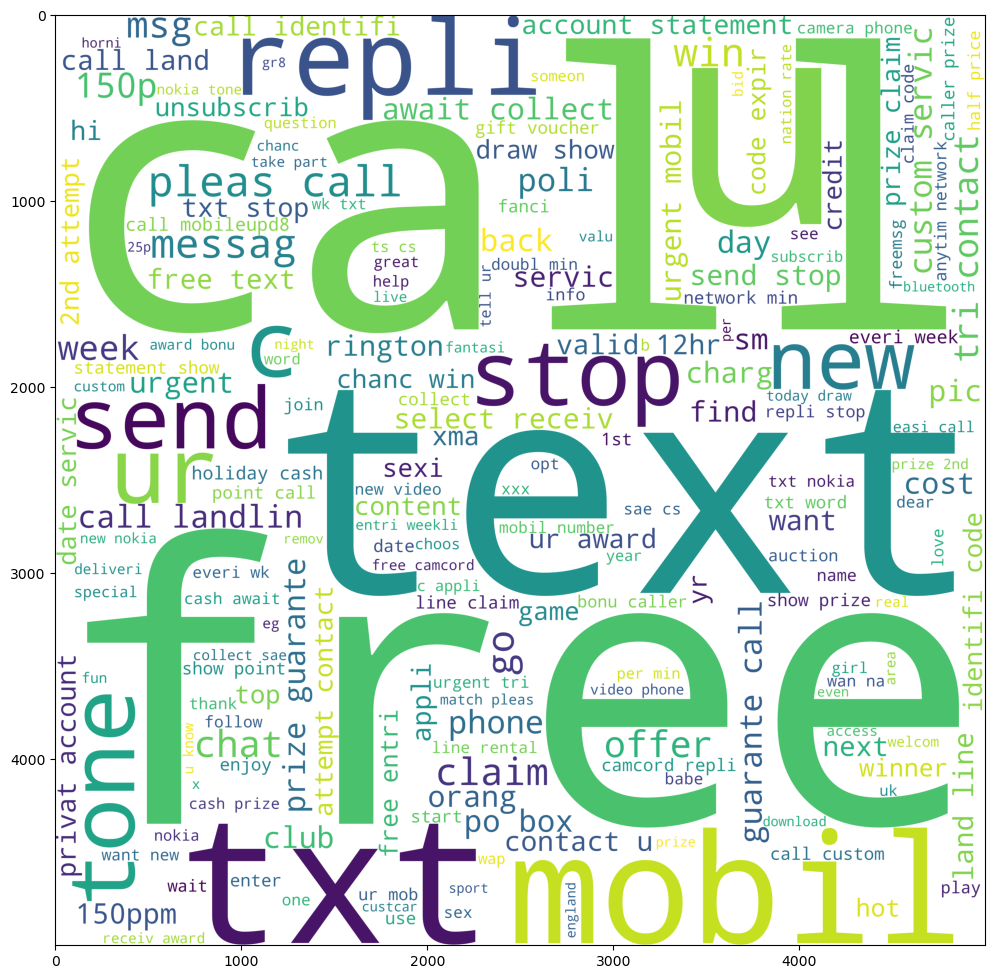

In [376]:
plt.figure(figsize=(12,16))
plt.imshow(spam_wc)

In [385]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [399]:
for msg in df[df['target']==1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [401]:
spam_corpus = []
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [405]:
len(spam_corpus)

9939

In [409]:
!pip install Counter

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5425 sha256=032fcdb2bf31955f1796b2821361c2f90cb41f2fb8f19807a253e3961a650792
  Stored in directory: c:\users\manis\appdata\local\pip\cache\wheels\08\5b\a0\8f15503db6a45a1d8747bf0f1438411cb37484ac4dfdfe6c0b
Successfully built Counter


<Axes: xlabel='0', ylabel='1'>

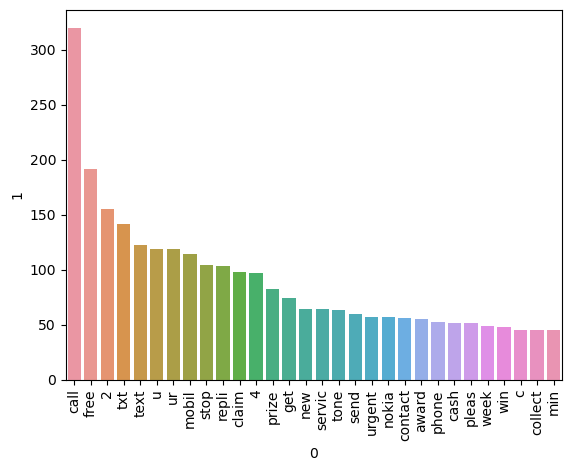

In [441]:
from collections import Counter
# Assuming spam_corpus is a list of words or tokens
most_common = pd.DataFrame(Counter(spam_corpus).most_common(30))
plt.xsticks(rotation='vertical')
# Corrected sns.barplot with keyword arguments
sns.barplot(x=most_common[0], y=most_common[1])


In [445]:
ham_corpus = []
for msg in df[df['target']== 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [447]:
len(ham_corpus)

35404

<Axes: xlabel='0', ylabel='1'>

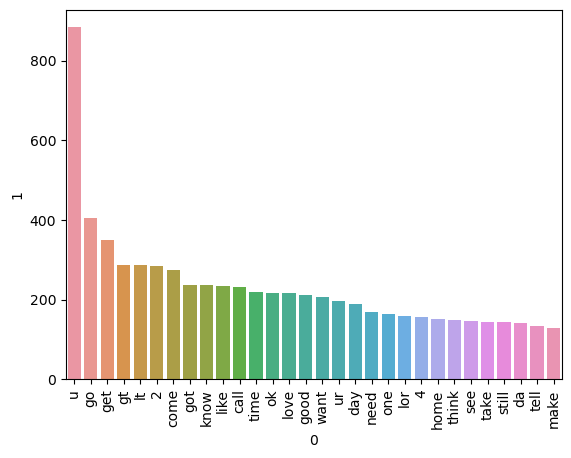

In [449]:
from collections import Counter
# Assuming spam_corpus is a list of words or tokens
most_common = pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.xticks(rotation='vertical')
# Corrected sns.barplot with keyword arguments
sns.barplot(x=most_common[0], y=most_common[1])


# 4. Model Building- Using Naive Bayes as starting algorithm and further will be using other algorithms as required.
Naive Bayes is best for text based work

In [488]:
!pip install scikit-learn

In [539]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfdif = TfidfVectorizer(max_features=3000)

In [541]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [640]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [545]:
y = df['target'].values

In [547]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [549]:
from sklearn.model_selection import train_test_split

In [551]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [553]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [555]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [559]:
# Train the model and make predictions
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

# Calculate and print the metrics
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [569]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

# Calculate and print the metrics
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [575]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

# Calculate and print the metrics
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [581]:
# tfidf -> mnb
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 991.0 kB/s eta 0:02:06
   ---------------------------------------- 0.1/124.9 MB 1.4 MB/s eta 0:01:27
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:40
   ---------------------------------------- 0.3/124.9 MB 1.3 MB/s eta 0:01:39
   ---------------------------------------- 0.4/124.9 MB 1.4 MB/s eta 0:01:33
   ---------------------------------------- 0.5/124.9 MB 1.5 MB/s eta 0:01:25
   ---------------------------------------- 0.6/124.9 MB 1.7 MB/s eta 0:01:14
   ---------------------------------------- 0.7/124.9 MB 1.8 MB/s eta 0:01:09
   ---------------------------------------- 0.9/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 1.0/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 1.2/124.9 MB 2.2 MB/s eta

In [583]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [585]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [599]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [603]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [605]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [607]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


C:\Users\manis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [621]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [623]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [625]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [627]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,DT,Accuracy,0.926499
8,BgC,Accuracy,0.962282
9,NB,Accuracy,0.964217


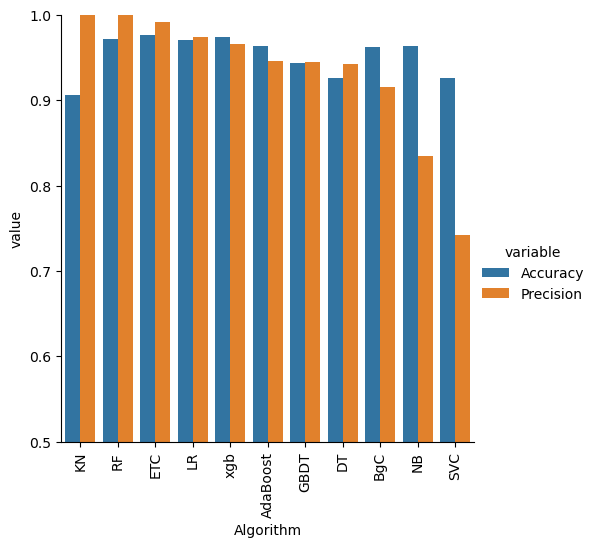

In [617]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [629]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [632]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [634]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [636]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [654]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [656]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [658]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,DT,0.926499,0.942857,0.926499,0.942857,0.926499,0.942857,0.926499,0.942857
8,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437


In [660]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [662]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [669]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [671]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [673]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [675]:
from sklearn.ensemble import StackingClassifier

In [686]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [688]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))


Accuracy 0.9845261121856866
Precision 0.9765625


In [690]:
import pickle 
pickle.dump(tfdif,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb')) 